In [1]:
words = "Downloads/Data/word_data.pkl"

In [2]:
authors = "Downloads/Data/email_authors.pkl"

In [3]:
import pandas as pd

In [4]:
authors

'Downloads/Data/email_authors.pkl'

In [5]:
authors_file =  pd.read_pickle(authors)
words_file = pd.read_pickle(words)

In [8]:
x = words_file

In [9]:
y = authors_file

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif

In [13]:
### text vectorization
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed  = vectorizer.transform(X_test)

In [14]:
### feature selection
selector = SelectPercentile(f_classif, percentile=30)
selector.fit(X_train_transformed, y_train)
X_train_transformed = selector.transform(X_train_transformed).toarray()
X_test_transformed  = selector.transform(X_test_transformed).toarray()

In [15]:
## info on the data
print("number of Chris training emails:", sum(y_train))
print("number of Sara training emails:", len(y_train)-sum(y_train))

number of Chris training emails: 6161
number of Sara training emails: 6143


In [16]:
from sklearn.svm import SVC

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [18]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_transformed, y_train)

SVC(kernel='linear')

In [19]:
svc_predicted = svclassifier.predict(X_test_transformed)

SVC Score: 
 99.47
SVC Test Score: 
 98.46
Accuracy: 
 0.984641638225256
[[2585   49]
 [  32 2608]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2634
           1       0.98      0.99      0.98      2640

    accuracy                           0.98      5274
   macro avg       0.98      0.98      0.98      5274
weighted avg       0.98      0.98      0.98      5274



<AxesSubplot:>

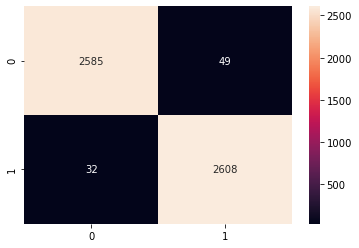

In [20]:
svc_score = round(svclassifier.score(X_train_transformed, y_train) * 100, 2)
svc_score_test = round(svclassifier.score(X_test_transformed, y_test) * 100, 2)
print('SVC Score: \n', svc_score)
print('SVC Test Score: \n', svc_score_test)
print('Accuracy: \n', accuracy_score(y_test, svc_predicted))
print(confusion_matrix(y_test,svc_predicted))
print(classification_report(y_test,svc_predicted))

sns.heatmap(confusion_matrix(y_test,svc_predicted),annot=True,fmt="d")